In [ ]:
from optimization_methods import ase_bend
from tscode import Docker
import numpy as np
import os
os.chdir(r'C:\Users\ehrma\Desktop\Monomolecular')
docker = Docker('input.txt', 'BEND_TEST')

In [ ]:
vars(docker)

In [ ]:
docker.options.fix_angles_in_deformation = True

In [ ]:
%%time
traj = 'FIXED_ANGLES'
mol = docker.objects[0]
pivot = mol.pivots[0]

bent_mol_1 = ase_bend(docker,
                      mol,
                      pivot,

                      1,
                    #   0.8*np.linalg.norm(pivot.pivot),

                      method=f'{docker.options.theory_level}',
                      title=f'{mol.rootname} - pivot 0',
                      traj=traj,
                      check=False,  # avoid returning the non-bent molecule,
                                    # even if this means having it scrambled
                      )

In [ ]:
docker.options.fix_angles_in_deformation = False

In [ ]:
%%time
traj = 'FREE_ANGLES'
mol = docker.objects[0]
pivot = mol.pivots[0]

bent_mol_2 = ase_bend(docker,
                      mol,
                      pivot,

                      1,
                    #   0.8*np.linalg.norm(pivot.pivot),

                      method=f'{docker.options.theory_level}',
                      title=f'{mol.rootname} - pivot 0',
                      traj=traj,
                      check=False,  # avoid returning the non-bent molecule,
                                    # even if this means having it scrambled
                      )

In [ ]:
os.system('ase gui')

## Atropisomer code testing

In [1]:
from atropisomer_module import ase_torsion_TSs
from cclib.io import ccread
import os
os.chdir(r'C:\Users\ehrma\Desktop\Monomolecular\atropo')

data = ccread('C2H6.xyz')
dihedral = [1, 0, 4, 5]

# data = ccread('axis.xyz')
# dihedral = [1, 0, 11, 13]


In [2]:
from atropisomer_module import ase_scan
from utils import write_xyz

# structures, energies = ase_scan(data.atomcoords[0], data.atomnos, 'MOPAC', 'PM7', dihedral, degrees=10, steps=36, relaxed=False)

# with open('test_turn.xyz', 'w') as f:
#     for structure in structures:
#         write_xyz(structure, data.atomnos, f)
# os.system('avogadro test_turn.xyz')

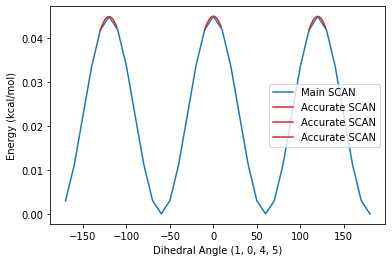

In [3]:

structures, energies, freqs = ase_torsion_TSs(data.atomcoords[0], data.atomnos, dihedral, 'MOPAC', 'PM7', debug=True, bernytraj='temp_traj')

In [4]:
for s in range(len(structures)):
    print(f'Structure {s}: {len([i for i in freqs[s].imag if i != 0])} negative frequencies')

In [5]:
with open('test_atropo.xyz', 'w') as f:
    for structure in structures:
        write_xyz(structure, data.atomnos, f)
os.system('avogadro test_atropo.xyz')

0

In [2]:
import pickle
figx = pickle.load(open('temp_plt.pickle', 'rb'))
figx.set_size_inches(18.5, 10.5)
figx.show()

FileNotFoundError: [Errno 2] No such file or directory: 'temp_plt.pickle'